## 유전입자가 존재할 때의 전위

![fig2](fig2.png)

#### 분극이 발생하지 않은 초기(t=0)의 전위 분포 계산

#### 적용 상수

$\epsilon = 1$<br>
$\rho= 0.5$<br>
관의 반경 $= 3mm$<br>
전극의 반경 $= 1.5mm$<br>
유전입자 반경 $= 0.3mm$

In [17]:
from fenics import *
from dolfin import *
from mshr import *
from math import atan2

domain1 = Circle(Point(0, 0), 1.5)
domain2 = Circle(Point(0, 0), 3)
domain3 = Circle(Point(0, 2.25), 0.3)
domain = domain2 - domain1 - domain3
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)

In [2]:
mesh

In [18]:
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (sqrt(x[0]*x[0]+x[1]*x[1])<1.5 + tol)

def mid_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3 + tol
    
r1 = Expression("sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25))", degree=1)
theta1 = Expression("atan2(x[1],(x[1]-2.25))", degree=1)

bc1 = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary),
     DirichletBC(X, Expression("0", r=r1, t=theta1, degree=2), mid_boundary)]

In [19]:
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

In [20]:
V = Function(X)
solve(a == L, V, bc1)

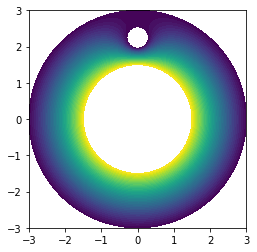

In [21]:
plot(V)

![fig2](fig1.png)

![fig2](fig3.png)

In [7]:
#유전체 위아래 boundary 설정

def midup_boundary(x, on_boundry):
    theta1 = atan2(x[1]-2.25,x[0])
    return on_boundry and  0+tol < theta1 < pi-tol and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol

def middown_boundary(x, on_boundry):
    theta1 = atan2(x[1]-2.25,x[0])
    return on_boundry and  -pi-tol < theta1 < 0-tol and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol


bc3 = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary),
     DirichletBC(X, Expression("15",r=r1,t=theta1, degree=2), midup_boundary),
     DirichletBC(X, Expression("0",r=r1,t=theta1, degree=2), middown_boundary)]

In [8]:
# Compute solution
V = Function(X)
solve(a == L, V, bc3)

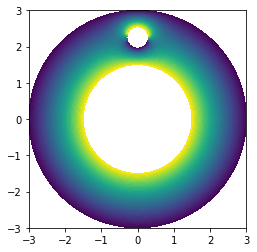

In [9]:
plot(V)

#### 앞으로의 진행 방향
<br>
<br>
1. 입자 위치(r)에 관한 포텐셜 식을 도출해야 함<br><br>
2. 이러한 예제를 컴퓨터로 풀이한 경우가 있는지 지속적으로 찾아봄

### r 값에 따른 전위 분포

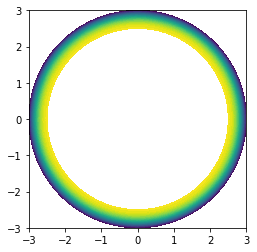

In [10]:
# create Mesh
domain1 = Circle(Point(0, 0), 2.5)
domain2 = Circle(Point(0, 0), 3)
domain = domain2 - domain1
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)


r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (2.5<sqrt(x[0]*x[0]+x[1]*x[1])<2.5 + tol)

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary)]


# Define variational proble
V1 = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V1), grad(v))*dx
L = rho*v*dx

# Compute solution
V1 = Function(X)
solve(a == L, V1, bc)

plot(V1)

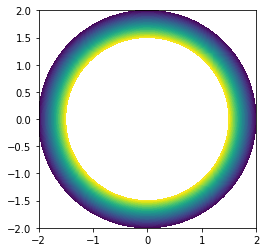

In [11]:
# create Mesh
domain3 = Circle(Point(0, 0), 1.5)
domain4 = Circle(Point(0, 0), 2)
domain_1 = domain4 - domain3
mesh1 = generate_mesh(domain_1, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh1, 'P', 1)

r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary1(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 2-tol

def inner_boundary1(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1])<1.5 + tol

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary1),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary1)]


# Define variational proble
V2 = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V2), grad(v))*dx
L = rho*v*dx

# Compute solution
V2 = Function(X)
solve(a == L, V2, bc)

plot(V2)

(<matplotlib.tri.tricontour.TriContourSet at 0x7fc666e7ec88>,
 <matplotlib.tri.tricontour.TriContourSet at 0x7fc666e88550>)

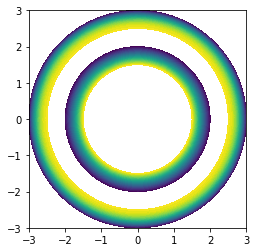

In [12]:
plot(V1), plot(V2)